In [144]:
import numpy as np
import pandas as pd

In [145]:
d1 = pd.read_csv("Out_LoginHistory.csv")
d1 = d1.loc[:, ~d1.columns.str.contains('^Unnamed')]
d1

,PARTY_ID,LAST_LOGIN,TOTAL_LOGIN,Churn
0,233823836,31-01-2017 11:28,1,1
1,233823838,12-06-2017 11:22,17,0
2,233823846,13-04-2017 12:44,2,1
3,233823847,02-03-2017 07:15,1,1
4,233823851,12-06-2017 13:09,48,0
...,...,...,...,...
24072,685219705,21-10-2020 17:58,1,1
24073,685231467,22-10-2020 08:55,1,1
24074,685231471,22-10-2020 08:52,1,1
24075,685231473,22-10-2020 09:02,1,1


In [146]:
d2 = pd.read_csv("Out_TransactionHistory.csv")
d2 = d2.loc[:, ~d2.columns.str.contains('id')]
d2

,PARTY_ID,AMOUNT,VALUE_DATE,Counts,churn
0,240924299,500000,22-08-2018,334,0
1,323871147,190000,22-08-2018,7,1
2,349707008,1454874,22-08-2018,143,0
3,240285235,369000,22-08-2018,305,0
4,240253860,275844,22-08-2018,33,1
...,...,...,...,...,...
2167,654066866,139700,30-09-2020,2,1
2168,633180744,2273,05-10-2020,2,1
2169,685219699,20140,21-10-2020,4,1
2170,633157466,2273,14-09-2020,1,1


In [147]:
d3 = pd.read_csv("Out_InvoiceHistory.csv")
d3 = d3.loc[:, ~d3.columns.str.contains('^Unnamed')]
d3

,INVOICE_ID,PARTY_ID,CURRENCY,TAXEXCLUSIVEAMOUNT,TAXINCLUSIVEAMOUNT,PAYABLEAMOUNT,ISSUEDATE,TAXPOINTDATE,DUEDATE,Issue_Year,Total_Invoice,churn
0,214341229,233824028,HUF,838701.0,1065150.0,1065150.0,01-05-2017,01-05-2017,08-05-2017,2017,90,0
1,215035971,233824067,EUR,510.0,647.7,647.7,07-05-2017,07-05-2017,15-05-2017,2017,156,0
2,216022915,233824235,HUF,1850.0,2350.0,2350.0,08-05-2017,08-05-2017,16-05-2017,2017,13,1
3,492975018,420047158,HUF,1150000.0,1460500.0,1460500.0,03-07-2019,25-06-2019,02-08-2019,2019,68,1
4,492975253,233823923,HUF,120.0,152.0,152.0,03-07-2019,03-07-2019,11-07-2019,2019,51,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4832,671856741,641558836,HUF,297624.0,297624.0,297624.0,30-09-2020,30-09-2020,30-10-2020,2020,1,1
4833,671858645,631247080,HUF,240000.0,240000.0,240000.0,30-09-2020,30-09-2020,30-09-2020,2020,1,1
4834,674018453,645366498,HUF,360000.0,457200.0,457200.0,05-10-2020,05-10-2020,07-10-2020,2020,1,1
4835,682703613,666202718,HUF,46800.0,59436.0,59436.0,12-10-2020,12-10-2020,27-10-2020,2020,1,1


In [148]:
# f1 = pd.merge(d1,d2, how='outer', left_on='PARTY_ID', right_on='PARTY_ID')
f1 = pd.merge(d1,d2, on='PARTY_ID')

In [149]:
f1

,PARTY_ID,LAST_LOGIN,TOTAL_LOGIN,Churn,AMOUNT,VALUE_DATE,Counts,churn
0,233823838,12-06-2017 11:22,17,0,355600,15-06-2017,18,1
1,233823907,30-03-2017 09:44,6,1,21993,23-01-2019,1,1
2,233823932,19-05-2017 22:40,28,0,6490,29-06-2017,2,1
3,233823942,02-06-2017 05:43,13,0,55728,02-06-2017,23,1
4,233824041,02-05-2017 12:55,2,1,2873,21-04-2017,1,1
...,...,...,...,...,...,...,...,...
1052,673996690,02-10-2020 11:26,10,0,127000,20-10-2020,23,1
1053,674049502,06-10-2020 13:42,2,1,49500,20-10-2020,1,1
1054,674049503,06-10-2020 13:46,1,1,996950,06-10-2020,1,1
1055,684845706,16-10-2020 07:41,2,1,63500,16-10-2020,1,1


In [150]:
# final = pd.merge(f1,d3, how='outer', left_on='PARTY_ID', right_on='PARTY_ID')
# # d3.tail(50)
final = pd.merge(f1,d3,  on='PARTY_ID')

In [151]:
final

,PARTY_ID,LAST_LOGIN,TOTAL_LOGIN,Churn,AMOUNT,VALUE_DATE,Counts,churn_x,INVOICE_ID,CURRENCY,TAXEXCLUSIVEAMOUNT,TAXINCLUSIVEAMOUNT,PAYABLEAMOUNT,ISSUEDATE,TAXPOINTDATE,DUEDATE,Issue_Year,Total_Invoice,churn_y
0,233823838,12-06-2017 11:22,17,0,355600,15-06-2017,18,1,208733196,HUF,560.0,711.0,711.0,22-03-2017,17-03-2017,03-04-2017,2017,29,1
1,233824085,08-06-2017 13:41,27,0,36000,12-07-2017,12,1,221527162,HUF,4937.0,6270.0,6270.0,31-05-2017,29-05-2017,31-05-2017,2017,2,1
2,233824293,23-05-2017 07:27,37,0,2273,04-01-2018,3,1,238682017,HUF,57232.0,72685.0,72685.0,13-09-2017,12-09-2017,13-10-2017,2017,20,1
3,233824379,14-06-2017 03:47,46,0,2273,27-11-2018,7,1,406207468,HUF,445527.0,565819.0,565819.0,11-12-2018,11-12-2018,19-12-2018,2018,3,1
4,233824398,25-05-2017 14:33,47,0,2060,23-01-2019,42,1,416511140,HUF,25000.0,31750.0,31750.0,09-01-2019,09-01-2019,17-01-2019,2019,21,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750,665282246,10-09-2020 15:08,8,1,100000,21-10-2020,1,1,685227636,HUF,630000.0,630000.0,630000.0,22-10-2020,22-10-2020,30-10-2020,2020,2,1
751,665818950,11-09-2020 12:36,20,0,2273,02-10-2020,1,1,666226429,HUF,686517.0,871877.0,871877.0,15-09-2020,15-09-2020,23-09-2020,2020,37,1
752,666202718,12-09-2020 16:42,10,0,1000,12-09-2020,22,1,682703613,HUF,46800.0,59436.0,59436.0,12-10-2020,12-10-2020,27-10-2020,2020,1,1
753,666258671,17-09-2020 17:12,9,0,137000,12-10-2020,5,1,666269170,HUF,450000.0,450000.0,450000.0,18-09-2020,18-09-2020,18-09-2020,2020,12,1


In [152]:
final.drop(['Churn', 'churn_x', 'churn_y'], axis=1, inplace=True)

In [153]:
final

,PARTY_ID,LAST_LOGIN,TOTAL_LOGIN,AMOUNT,VALUE_DATE,Counts,INVOICE_ID,CURRENCY,TAXEXCLUSIVEAMOUNT,TAXINCLUSIVEAMOUNT,PAYABLEAMOUNT,ISSUEDATE,TAXPOINTDATE,DUEDATE,Issue_Year,Total_Invoice
0,233823838,12-06-2017 11:22,17,355600,15-06-2017,18,208733196,HUF,560.0,711.0,711.0,22-03-2017,17-03-2017,03-04-2017,2017,29
1,233824085,08-06-2017 13:41,27,36000,12-07-2017,12,221527162,HUF,4937.0,6270.0,6270.0,31-05-2017,29-05-2017,31-05-2017,2017,2
2,233824293,23-05-2017 07:27,37,2273,04-01-2018,3,238682017,HUF,57232.0,72685.0,72685.0,13-09-2017,12-09-2017,13-10-2017,2017,20
3,233824379,14-06-2017 03:47,46,2273,27-11-2018,7,406207468,HUF,445527.0,565819.0,565819.0,11-12-2018,11-12-2018,19-12-2018,2018,3
4,233824398,25-05-2017 14:33,47,2060,23-01-2019,42,416511140,HUF,25000.0,31750.0,31750.0,09-01-2019,09-01-2019,17-01-2019,2019,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750,665282246,10-09-2020 15:08,8,100000,21-10-2020,1,685227636,HUF,630000.0,630000.0,630000.0,22-10-2020,22-10-2020,30-10-2020,2020,2
751,665818950,11-09-2020 12:36,20,2273,02-10-2020,1,666226429,HUF,686517.0,871877.0,871877.0,15-09-2020,15-09-2020,23-09-2020,2020,37
752,666202718,12-09-2020 16:42,10,1000,12-09-2020,22,682703613,HUF,46800.0,59436.0,59436.0,12-10-2020,12-10-2020,27-10-2020,2020,1
753,666258671,17-09-2020 17:12,9,137000,12-10-2020,5,666269170,HUF,450000.0,450000.0,450000.0,18-09-2020,18-09-2020,18-09-2020,2020,12


In [154]:
# final.to_csv(r'Final.csv')

In [159]:
mean = np.mean(final['Total_Invoice']) 
std = np.std(final['Total_Invoice']) 
print('mean of the dataset is', mean) 
print('std. deviation is', std) 

mean of the dataset is 38.03973509933775
std. deviation is 49.94233506473149


In [160]:
mean = np.mean(final['Counts']) 
std = np.std(final['Counts']) 
print('mean of the dataset is', mean) 
print('std. deviation is', std) 

mean of the dataset is 14.203973509933775
std. deviation is 33.97206854409746


In [161]:
mean = np.mean(final['TOTAL_LOGIN']) 
std = np.std(final['TOTAL_LOGIN']) 
print('mean of the dataset is', mean) 
print('std. deviation is', std) 

mean of the dataset is 47.35099337748344
std. deviation is 22.889657190486048


In [162]:
final

,PARTY_ID,LAST_LOGIN,TOTAL_LOGIN,AMOUNT,VALUE_DATE,Counts,INVOICE_ID,CURRENCY,TAXEXCLUSIVEAMOUNT,TAXINCLUSIVEAMOUNT,PAYABLEAMOUNT,ISSUEDATE,TAXPOINTDATE,DUEDATE,Issue_Year,Total_Invoice
0,233823838,12-06-2017 11:22,17,355600,15-06-2017,18,208733196,HUF,560.0,711.0,711.0,22-03-2017,17-03-2017,03-04-2017,2017,29
1,233824085,08-06-2017 13:41,27,36000,12-07-2017,12,221527162,HUF,4937.0,6270.0,6270.0,31-05-2017,29-05-2017,31-05-2017,2017,2
2,233824293,23-05-2017 07:27,37,2273,04-01-2018,3,238682017,HUF,57232.0,72685.0,72685.0,13-09-2017,12-09-2017,13-10-2017,2017,20
3,233824379,14-06-2017 03:47,46,2273,27-11-2018,7,406207468,HUF,445527.0,565819.0,565819.0,11-12-2018,11-12-2018,19-12-2018,2018,3
4,233824398,25-05-2017 14:33,47,2060,23-01-2019,42,416511140,HUF,25000.0,31750.0,31750.0,09-01-2019,09-01-2019,17-01-2019,2019,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750,665282246,10-09-2020 15:08,8,100000,21-10-2020,1,685227636,HUF,630000.0,630000.0,630000.0,22-10-2020,22-10-2020,30-10-2020,2020,2
751,665818950,11-09-2020 12:36,20,2273,02-10-2020,1,666226429,HUF,686517.0,871877.0,871877.0,15-09-2020,15-09-2020,23-09-2020,2020,37
752,666202718,12-09-2020 16:42,10,1000,12-09-2020,22,682703613,HUF,46800.0,59436.0,59436.0,12-10-2020,12-10-2020,27-10-2020,2020,1
753,666258671,17-09-2020 17:12,9,137000,12-10-2020,5,666269170,HUF,450000.0,450000.0,450000.0,18-09-2020,18-09-2020,18-09-2020,2020,12


In [163]:
def find_cus(df):
    if df['Total_Invoice'] < 38 and df['Counts'] < 14 and df['TOTAL_LOGIN'] < 47:
        return 1
    else:
        return 0

In [164]:
final['churn'] = final.apply(find_cus,axis=1)

In [170]:
final

,PARTY_ID,LAST_LOGIN,TOTAL_LOGIN,AMOUNT,VALUE_DATE,Counts,INVOICE_ID,CURRENCY,TAXEXCLUSIVEAMOUNT,TAXINCLUSIVEAMOUNT,PAYABLEAMOUNT,ISSUEDATE,TAXPOINTDATE,DUEDATE,Issue_Year,Total_Invoice,churn
0,233823838,12-06-2017 11:22,17,355600,15-06-2017,18,208733196,HUF,560.0,711.0,711.0,22-03-2017,17-03-2017,03-04-2017,2017,29,0
1,233824085,08-06-2017 13:41,27,36000,12-07-2017,12,221527162,HUF,4937.0,6270.0,6270.0,31-05-2017,29-05-2017,31-05-2017,2017,2,1
2,233824293,23-05-2017 07:27,37,2273,04-01-2018,3,238682017,HUF,57232.0,72685.0,72685.0,13-09-2017,12-09-2017,13-10-2017,2017,20,1
3,233824379,14-06-2017 03:47,46,2273,27-11-2018,7,406207468,HUF,445527.0,565819.0,565819.0,11-12-2018,11-12-2018,19-12-2018,2018,3,1
4,233824398,25-05-2017 14:33,47,2060,23-01-2019,42,416511140,HUF,25000.0,31750.0,31750.0,09-01-2019,09-01-2019,17-01-2019,2019,21,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750,665282246,10-09-2020 15:08,8,100000,21-10-2020,1,685227636,HUF,630000.0,630000.0,630000.0,22-10-2020,22-10-2020,30-10-2020,2020,2,1
751,665818950,11-09-2020 12:36,20,2273,02-10-2020,1,666226429,HUF,686517.0,871877.0,871877.0,15-09-2020,15-09-2020,23-09-2020,2020,37,1
752,666202718,12-09-2020 16:42,10,1000,12-09-2020,22,682703613,HUF,46800.0,59436.0,59436.0,12-10-2020,12-10-2020,27-10-2020,2020,1,0
753,666258671,17-09-2020 17:12,9,137000,12-10-2020,5,666269170,HUF,450000.0,450000.0,450000.0,18-09-2020,18-09-2020,18-09-2020,2020,12,1


475 No churn!
280 Churn


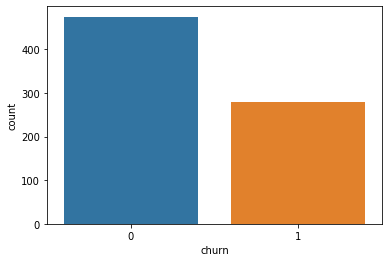

In [171]:
import seaborn as sns
a=len(final[final.churn==0])
b=len(final[final.churn==1])
print(a,"No churn!")
print(b,"Churn")
sns.countplot(final['churn'])#this function counts the values in a column and plots each differently according to the numbers

In [172]:
final.drop(['LAST_LOGIN', 'AMOUNT', 'VALUE_DATE', 'INVOICE_ID', 'TAXEXCLUSIVEAMOUNT', 'TAXINCLUSIVEAMOUNT', 'PAYABLEAMOUNT', 'ISSUEDATE', 'TAXPOINTDATE', 'DUEDATE'], axis=1, inplace=True)

In [173]:
final

,PARTY_ID,TOTAL_LOGIN,Counts,CURRENCY,Issue_Year,Total_Invoice,churn
0,233823838,17,18,HUF,2017,29,0
1,233824085,27,12,HUF,2017,2,1
2,233824293,37,3,HUF,2017,20,1
3,233824379,46,7,HUF,2018,3,1
4,233824398,47,42,HUF,2019,21,0
...,...,...,...,...,...,...,...
750,665282246,8,1,HUF,2020,2,1
751,665818950,20,1,HUF,2020,37,1
752,666202718,10,22,HUF,2020,1,0
753,666258671,9,5,HUF,2020,12,1


In [174]:
final.to_csv(r'Final.csv')